# RNN: 박혜정 교수님

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, TimeDistributed, LSTM, Activation
from keras.utils import np_utils

In [ ]:
import os # directory 등 

In [ ]:
from keras.utils.vis_utils import plot_model

In [ ]:
sample="hihello"
char_set = list(set(sample))
char_set

In [ ]:
char_dic={w: i for i, w in enumerate(char_set)} # 값이 넘어올때마다 i를 갱신해주겠다
char_dic # 뒤집기를 통해 캐릭터 사전을 만들 수 있다

In [ ]:
# 이걸 one-hot으로 바꿔주는 것: to categorical

In [ ]:
# 지도학습이기 떄문에 학습용 / 테스트 데이터 (x,y) 구분
x_str = sample[:-1] # -1전까지 = 뒤에서 한개 전까지 = hello에서 o 전까지의 데이터를 입력으로 넣겠다
y_str = sample[1:] # 1번부터 (두번쨰)
print(x_str) # 입력용 데이터
print(y_str) # 출력용 데이터

In [ ]:
data_dim = len(char_set) # 길이가 5이다
timesteps = len(y_str) # y 개수와 연관이 있다
num_classes = len(char_set)

In [ ]:
# 원핫으로 바꾸기
x = [char_dic[c] for c in x_str] # char to index
y = [char_dic[c] for c in y_str] # char to index
print(x)
print(y)

In [ ]:
#One-hot encoding
x = np_utils.to_categorical(x, num_classes=num_classes)
# reshape X to be [samples, time steps, features]
x = np.reshape(x,(-1, len(x), data_dim))
print(x)
print(x.shape)

In [ ]:
#One-hot encoding
y = np_utils.to_categorical(y, num_classes=num_classes)
# reshape X to be [samples, time steps, features]
y = np.reshape(y,(-1,len(y), data_dim))
print(y)
print(y.shape)

### model 만들기

In [ ]:
# 기본적으로 사용하는 모델
model = Sequential()
model.add(SimpleRNN(num_classes, input_shape=(timesteps, data_dim), return_sequences=True))
model.add(TimeDistributed(Dense(num_classes)))
model.add(Activation('softmax'))
model.summary()

In [ ]:
# store model graph in png

In [ ]:
# plot_model(model, to_file=os.path.basename(__file__) + '.png')

In [ ]:
model.compile(loss='categorical_crossentropy', 
             optimizer = 'adam', metrics=['accuracy'])
model.fit(x,y,epochs=5)

In [ ]:
predictions = model.predict(x,verbose=0)

In [ ]:
for i, prediction in enumerate(predictions):
    print(prediction)
    x_index = np.argmax(x[i], axis=1)
    x_str = [char_set[j] for j in x_index]
    print(x_index, ''.join(x_str))
    
    index = np.argmax(prediction, axis=1)
    result=[char_set[j] for j in index]
    print(index, ''.join(result))

In [ ]:
# SimpleRNN말고 LSTM으로 돌려보기
model = Sequential()
model.add(LSTM(num_classes, input_shape=(timesteps, data_dim), return_sequences=True))
model.add(TimeDistributed(Dense(num_classes)))
model.add(Activation('softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', 
             optimizer = 'adam', metrics=['accuracy'])
model.fit(x,y,epochs=5)
predictions = model.predict(x,verbose=0)
for i, prediction in enumerate(predictions):
    print(prediction)
    x_index = np.argmax(x[i], axis=1)
    x_str = [char_set[j] for j in x_index]
    print(x_index, ''.join(x_str))
    
    index = np.argmax(prediction, axis=1)
    result=[char_set[j] for j in index]
    print(index, ''.join(result))

In [ ]:
# keras 안에 contrib 내의 함수들 섞어서

## 실습: daily stock (모두를 위한 딥러닝 데이터 참고)

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib
import os
tf.set_random_seed(777) #reproducibility
import matplotlib.pyplot as plt

### 1. Sort단계

In [ ]:
seq_length=7
data_dim=5 # 7,5에 해당하는 데이터 구조를 만들겠다
hidden_dim=10 # hidden layer = 안에 있는 node의 개수
output_dim = 1 # y가 하나가 나오도록 설계
learning_rate=0.01
iterations = 500


### 2. 설계

In [ ]:
xy1 = np.loadtxt('data-02-stock_daily.csv', delimiter=',')
xy1 = xy1[::-1] # reverse order (chronically ordered)

### 3. 단위 표준화

In [ ]:
min1 = np.min(xy1, 0) # 0 방향 = 위아래 방향 (열 단위)
max1 = np.max(xy1, 0)
xy=(xy1-min1)/(max1-min1) # regularization

In [ ]:
xy = (xy1-min1)/(max1-min1)

In [ ]:
xy[1]

In [ ]:
x=xy
y0=xy[:,-1]
y=xy[:,[-1]] # Close as label

In [ ]:
len(y) - seq_length

### 4. Reshape

In [ ]:
# build a dataset
dataX = []
dataY = []
for i in range(0, len(y) - seq_length):
    _x = x[i:i+seq_length]
    _y = y[i+seq_length] # Next close price
    print(_x, "->", _y)
    dataX.append(_x)
    dataY.append(_y)
dataX[0]

# train/test



In [ ]:
# train/test split
train_size = int(len(dataY)*0.7) # train data는 전체의 70%
test_size = len(dataY) - train_size
trainX, testX = np.array(dataX[0:train_size]), np.array(dataX[train_size:len(dataX)])
trainY, testY = np.array(dataY[0:train_size]), np.array(dataY[train_size:len(dataY)])

### 모델 만들기: softmax 안쓰기때문에 변환함수 굳이 안써도된다

In [ ]:
model3 = tf.keras.models.Sequential()
model3.add(tf.keras.layers.LSTM(10, input_shape=(7,5))) # node 10개
model3.add(tf.keras.layers.Dense(1)) # 마지막엔 값 하나만 예측하면 되기때문에 1

In [ ]:
optimizer = tf.train.AdamOptimizer(learning_rate)
model3.compile(loss='mean_squared_error', # 회귀형에 해당하는 loss function
              optimizer = optimizer, 
              metrics = ['mean_absolute_error', 'mean_squared_error']) # 하나의 모델을 각 시점마다 반복한다
model3.fit(trainX, trainY, epochs=100)
model3.evaluate(testX, testY)

In [ ]:
model3.summary()

In [ ]:
pred = model3.predict(testX)

In [ ]:
textY1 = (testY*(max1[-1]-min1[-1]))+min1[-1] # 정규화했던 것 다시 원상복귀
pred1 = (pred*(max1[-1]-min1[-1]))+min1[-1]

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(textY1, c="blue")
plt.plot(pred1, c="red")
plt.xlabel("Time Period")
plt.ylabel("Stock Price")
plt.show()

###  진짜 데이터갖고 실습: 강수량

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib
import os
tf.set_random_seed(777) #reproducibility
import matplotlib.pyplot as plt

In [2]:
#%% 1. Sort 단계
seq_length=14
data_dim=7
hidden_dim=10
output_dim=1
learning_rate=0.001
iterations=500

In [3]:
#%% 2. 설계

xy1 = np.loadtxt('C:/Users/Affinity/Documents/rainfall.csv', delimiter=',')
# reverse 해줄  필요 없다

In [4]:
#%% 3. 단위 표준화
min1 = np.min(xy1,0)
max1 = np.max(xy1,0)
xy=(xy1-min1)/(max1-min1) # regularization
xy[1]

array([0.03351955, 0.30769231, 0.26928675, 0.97771588, 0.        ,
       0.        , 0.01941748])

In [5]:
max1

array([  29.7,    3.5,   93. , 1024.2,   14.8,   10. ,   37.1])

In [6]:
x=xy
y=xy[:,[1]]

In [7]:
len(y) - seq_length

188

In [8]:
# build a dataset
dataX = []
dataY = []
for i in range(0, len(y) - seq_length):
    _x = x[i:i+seq_length]
    _y = y[i+seq_length] # Next rainfall
    print(_x, "->", _y)
    dataX.append(_x)
    dataY.append(_y)
dataX[0]

[[0.03072626 0.46153846 0.36681223 0.95543175 0.         0.34
  0.00485437]
 [0.03351955 0.30769231 0.26928675 0.97771588 0.         0.
  0.01941748]
 [0.0726257  0.19230769 0.21106259 1.         0.01923077 0.01
  0.03640777]
 [0.1396648  0.11538462 0.45414847 0.86908078 0.01923077 0.55
  0.06553398]
 [0.09217877 0.5        0.23289665 0.78830084 0.01923077 0.05
  0.07038835]
 [0.09217877 0.11538462 0.15574964 0.81615599 0.01923077 0.31
  0.07038835]
 [0.11731844 0.19230769 0.3216885  0.81058496 0.01923077 0.4
  0.05097087]
 [0.0726257  0.65384615 0.09752547 0.83286908 0.01923077 0.
  0.05097087]
 [0.03910615 0.15384615 0.06550218 0.93871866 0.01923077 0.49
  0.        ]
 [0.15363128 0.15384615 0.356623   0.75766017 0.03846154 0.81
  0.08252427]
 [0.23743017 0.03846154 0.50218341 0.72144847 0.03846154 0.61
  0.12864078]
 [0.24860335 0.15384615 0.33915575 0.66295265 0.03846154 0.39
  0.16262136]
 [0.20391061 0.19230769 0.43668122 0.73816156 0.03846154 0.
  0.11165049]
 [0.20949721 0.    

array([[0.03072626, 0.46153846, 0.36681223, 0.95543175, 0.        ,
        0.34      , 0.00485437],
       [0.03351955, 0.30769231, 0.26928675, 0.97771588, 0.        ,
        0.        , 0.01941748],
       [0.0726257 , 0.19230769, 0.21106259, 1.        , 0.01923077,
        0.01      , 0.03640777],
       [0.1396648 , 0.11538462, 0.45414847, 0.86908078, 0.01923077,
        0.55      , 0.06553398],
       [0.09217877, 0.5       , 0.23289665, 0.78830084, 0.01923077,
        0.05      , 0.07038835],
       [0.09217877, 0.11538462, 0.15574964, 0.81615599, 0.01923077,
        0.31      , 0.07038835],
       [0.11731844, 0.19230769, 0.3216885 , 0.81058496, 0.01923077,
        0.4       , 0.05097087],
       [0.0726257 , 0.65384615, 0.09752547, 0.83286908, 0.01923077,
        0.        , 0.05097087],
       [0.03910615, 0.15384615, 0.06550218, 0.93871866, 0.01923077,
        0.49      , 0.        ],
       [0.15363128, 0.15384615, 0.356623  , 0.75766017, 0.03846154,
        0.81      , 0.0

In [9]:
# TRAIN/TEST SPLIT
train_size = int(len(dataY)*0.7)
test_size = len(dataY) - train_size
trainX, testX = np.array(dataX[0:train_size]), np.array(dataX[train_size:len(dataX)])
trainY, testY = np.array(dataY[0:train_size]), np.array(dataY[train_size:len(dataY)])


In [10]:
trainX.shape

(131, 14, 7)

In [11]:
trainY.shape

(131, 1)

In [12]:
dataY

[array([0.69230769]),
 array([0.53846154]),
 array([0.30769231]),
 array([0.15384615]),
 array([0.11538462]),
 array([0.88461538]),
 array([0.26923077]),
 array([0.30769231]),
 array([0.53846154]),
 array([0.30769231]),
 array([0.65384615]),
 array([0.57692308]),
 array([0.30769231]),
 array([0.84615385]),
 array([0.23076923]),
 array([0.23076923]),
 array([0.76923077]),
 array([0.30769231]),
 array([0.03846154]),
 array([0.30769231]),
 array([0.46153846]),
 array([0.03846154]),
 array([0.15384615]),
 array([1.]),
 array([0.53846154]),
 array([0.69230769]),
 array([0.30769231]),
 array([0.53846154]),
 array([0.38461538]),
 array([0.57692308]),
 array([0.19230769]),
 array([0.38461538]),
 array([0.65384615]),
 array([0.38461538]),
 array([0.15384615]),
 array([0.19230769]),
 array([0.46153846]),
 array([0.23076923]),
 array([0.23076923]),
 array([0.07692308]),
 array([0.34615385]),
 array([0.53846154]),
 array([0.26923077]),
 array([0.26923077]),
 array([0.42307692]),
 array([0.46153846

In [17]:
model4 = tf.keras.models.Sequential()
model4.add(tf.keras.layers.LSTM(10, input_shape=(14,7),return_sequences=True))
model4.add(tf.keras.layers.LSTM(10))
model4.add(tf.keras.layers.Dense(1))
model4.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 14, 10)            720       
_________________________________________________________________
lstm_3 (LSTM)                (None, 10)                840       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 1,571
Trainable params: 1,571
Non-trainable params: 0
_________________________________________________________________


In [18]:
optimizer=tf.train.AdamOptimizer(learning_rate)
model4.compile(loss='mean_squared_error', 
              optimizer='adam', 
              metrics=['mean_absolute_error', 'mean_squared_error'])

model4.fit(trainX, trainY, epochs=100)
model4.evaluate(testX, testY)

Epoch 1/100
131/131 [==============================] - 1s 5ms/sample - loss: 0.1561 - mean_absolute_error: 0.3321 - mean_squared_error: 0.1561
Epoch 2/100
131/131 [==============================] - 0s 371us/sample - loss: 0.1094 - mean_absolute_error: 0.2622 - mean_squared_error: 0.1094
Epoch 3/100
131/131 [==============================] - 0s 413us/sample - loss: 0.0736 - mean_absolute_error: 0.2010 - mean_squared_error: 0.0736
Epoch 4/100
131/131 [==============================] - 0s 401us/sample - loss: 0.0520 - mean_absolute_error: 0.1736 - mean_squared_error: 0.0520
Epoch 5/100
131/131 [==============================] - 0s 413us/sample - loss: 0.0466 - mean_absolute_error: 0.1749 - mean_squared_error: 0.0466
Epoch 6/100
131/131 [==============================] - 0s 405us/sample - loss: 0.0489 - mean_absolute_error: 0.1833 - mean_squared_error: 0.0489
Epoch 7/100
131/131 [==============================] - 0s 416us/sample - loss: 0.0473 - mean_absolute_error: 0.1794 - mean_squared_e

131/131 [==============================] - 0s 466us/sample - loss: 0.0446 - mean_absolute_error: 0.1666 - mean_squared_error: 0.0446
Epoch 58/100
131/131 [==============================] - 0s 428us/sample - loss: 0.0448 - mean_absolute_error: 0.1648 - mean_squared_error: 0.0448
Epoch 59/100
131/131 [==============================] - 0s 451us/sample - loss: 0.0449 - mean_absolute_error: 0.1651 - mean_squared_error: 0.0449
Epoch 60/100
131/131 [==============================] - 0s 477us/sample - loss: 0.0447 - mean_absolute_error: 0.1653 - mean_squared_error: 0.0447
Epoch 61/100
131/131 [==============================] - 0s 432us/sample - loss: 0.0446 - mean_absolute_error: 0.1662 - mean_squared_error: 0.0446
Epoch 62/100
131/131 [==============================] - 0s 435us/sample - loss: 0.0445 - mean_absolute_error: 0.1676 - mean_squared_error: 0.0445
Epoch 63/100
131/131 [==============================] - 0s 413us/sample - loss: 0.0445 - mean_absolute_error: 0.1648 - mean_squared_error

[0.023668283923414715, 0.12632068, 0.023668285]

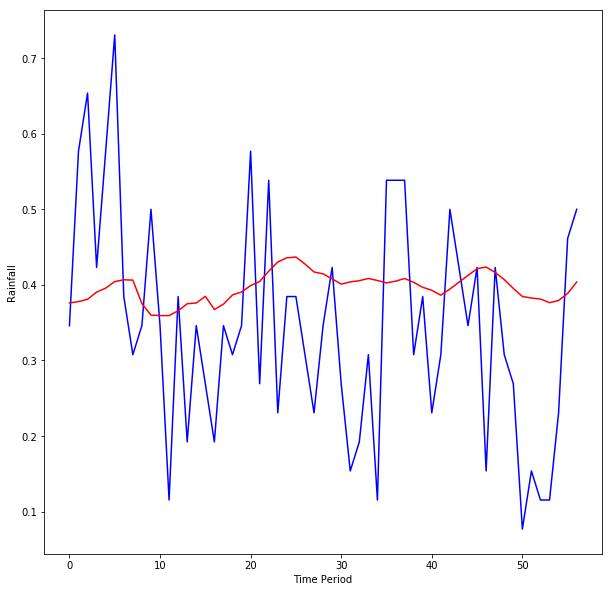

In [19]:
pred = model4.predict(testX)
# textY1 = (testY*(max1[1]-min1[1]))+min1[1] # 정규화했던 것 다시 원상복귀
# pred1 = (pred*(max1[1]-min1[1]))+min1[1]
plt.figure(figsize=(10,10))
plt.plot(testY, c="blue")
plt.plot(pred, c="red")
plt.xlabel("Time Period")
plt.ylabel("Rainfall")
plt.show()

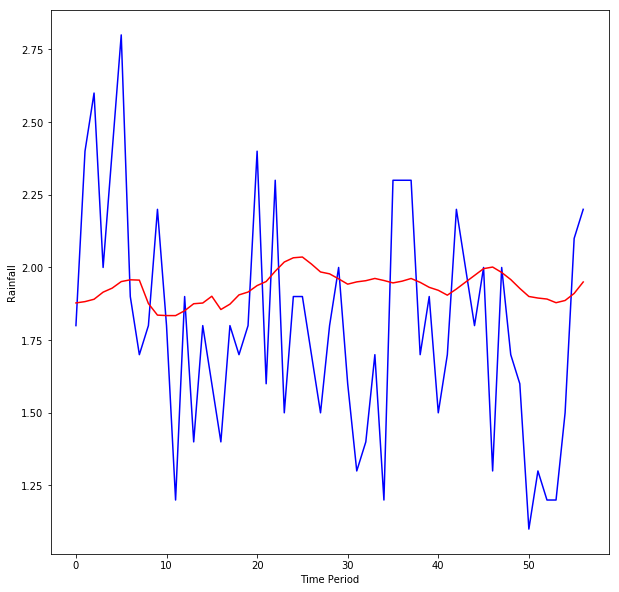

In [20]:
pred = model4.predict(testX)
textY1 = (testY*(max1[1]-min1[1]))+min1[1] # 정규화했던 것 다시 원상복귀
pred1 = (pred*(max1[1]-min1[1]))+min1[1]
plt.figure(figsize=(10,10))
plt.plot(textY1, c="blue")
plt.plot(pred1, c="red")
plt.xlabel("Time Period")
plt.ylabel("Rainfall")
plt.show()

In [ ]:
textY1